In [1]:
# https://www.kaggle.com/datasets/ashydv/advertising-dataset

In [2]:
# %pip install scikit-learn

In [3]:
# scikit-learn 설치 및 버전 확인
# pip install scikit-learn

import sklearn
sklearn.__version__

'1.8.0'

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import warnings
# warnings.filterwarnings("ignore")
# plt.style.use('ggplot')

In [5]:
import pandas as pd

# TODO: advertising.csv 파일을 읽어와서 5개의 레코드를 출력
advertising = pd.read_csv('data/advertising.csv')
# TODO 2
# advertising.head(5)
# advertising.tail(5)
advertising.sample(5)

,TV,Radio,Newspaper,Sales
151,121.0,8.4,48.7,11.6
147,243.2,49.0,44.3,25.4
170,50.0,11.6,18.4,8.4
80,76.4,26.7,22.3,11.8
131,265.2,2.9,43.0,17.7


In [6]:
# TODO: 데이터프레임 정보 확인하기

advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
# TODO: 통계정보 확인하기
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [8]:
# TODO: 통계 정보 행과 열 바꾸기
advertising.describe().T


,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,15.1305,5.283892,1.6,11.000,16.00,19.050,27.0


In [9]:
# TODO: 컬럼간의 상관계수 확인하기
advertising.corr()


,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


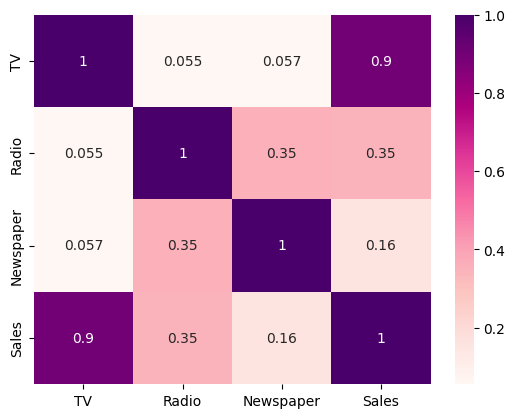

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

corrMatrix = advertising.corr()
sns.heatmap(corrMatrix, annot=True, cmap='RdPu')
plt.show()

In [11]:
# 히트맵을 기준으로 상관 관계가 높은 속성을 내림 차순으로 정렬하여 시각화

corr_sort = corrMatrix[['Sales']].sort_values(by='Sales', ascending=False) #TODO:YOUR_CODE_HERE)

corr_sort

,Sales
Sales,1.000000
TV,0.901208
Radio,0.349631
Newspaper,0.157960


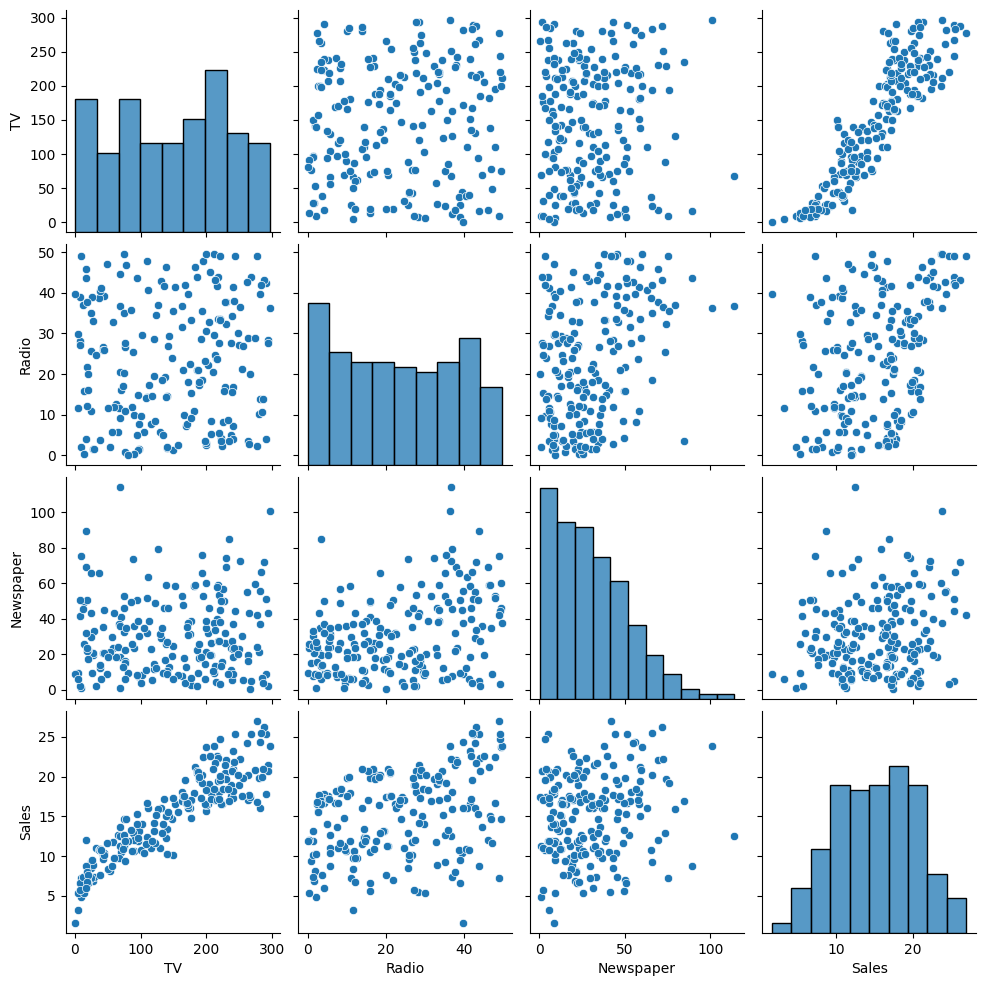

In [12]:
sns.pairplot(advertising)
plt.show()

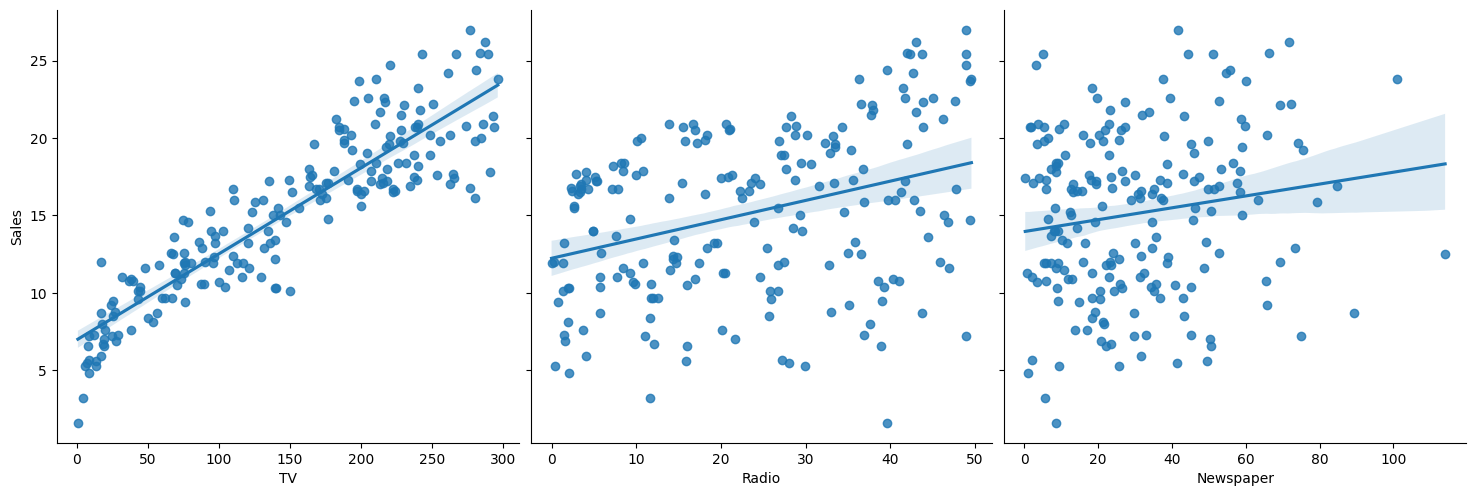

In [13]:
# 'TV', 'Radio', 'Newspaper'의 판매량 pairplot의 세개의 그래프만 그리면서 산점도와 함께 선형회귀선 포함하여 시각화하기

sns.pairplot(data=advertising, height=5, x_vars= ['TV','Radio','Newspaper'], y_vars='Sales', kind= 'reg') #TODO:YOUR_CODE_HERE
plt.show()

### 단순 선형 회귀

In [14]:
# 단순 선형 회귀로 모델 학습하고 평가하기
advertising

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [15]:
#독립변수로 TV 컬럼만 가져온다.
X_data1 = advertising[['TV']] # TODO:YOUR_CODE_HERE

#종속변수로 Sales 데이터를 가져온다 !종속변수는 시리즈형태로 가져와야함
y_data1 = advertising['Sales'] # TODO:YOUR_CODE_HERE

In [16]:
# 훈련 데이터와 테스트 데이터를 7:3 비율로 나누기, random_state = 42
from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_data1, y_data1, test_size=0.3,
                                                        random_state=10,) # TODO:YOUR_CODE_HERE
print(X_train1.shape, X_test1.shape, y_train1.shape, y_test1.shape)

(140, 1) (60, 1) (140,) (60,)


In [17]:
from sklearn.linear_model import LinearRegression

lr_model1 = LinearRegression() # 선형 회귀 모델 생성 TODO:YOUR_CODE_HERE

lr_model1

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [18]:
# 선형 회귀 모델 학습 TODO:YOUR_CODE_HERE

lr_model1.fit(X_train1, y_train1)

lr_model1

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


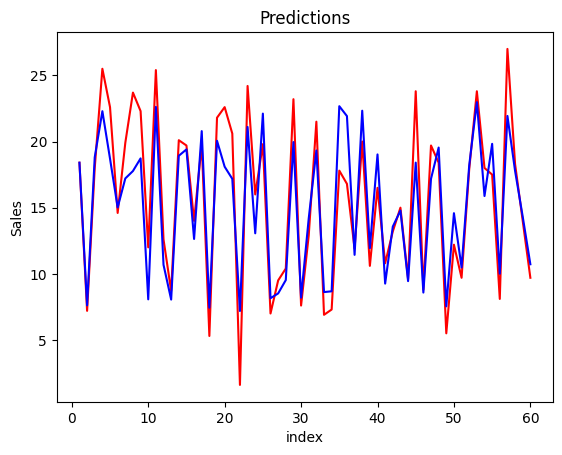

In [19]:
y_pred1 = lr_model1.predict(X_test1)

c = [i for i in range(1, 61, 1)]
plt.plot(c, y_test1, color = 'r') # 실젯값
plt.plot(c, y_pred1, color = 'b') # 예측값
plt.xlabel('index') # X축 이름
plt.ylabel('Sales') # Y축 이름
plt.title('Predictions') # 그래프 제목
plt.show()

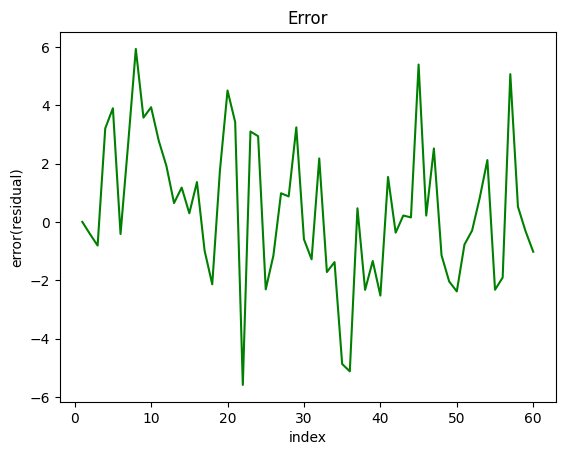

In [20]:
error = y_test1 - y_pred1 # 실젯값 - 예측값 TODO:YOUR_CODE_HERE

plt.plot(c, error, color = 'g')
plt.xlabel('index')
plt.ylabel('error(residual)')
plt.title('Error')
plt.show()

In [21]:
# 평가 지표 구하기

In [22]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print(f'MSE: {mean_squared_error(y_test1, y_pred1):.2f}') # 평균 제곱 오차(MSE)
print(f'r2_score: {r2_score(y_test1, y_pred1):.2f}') # 결정계수(R2)

MSE: 6.46
r2_score: 0.83


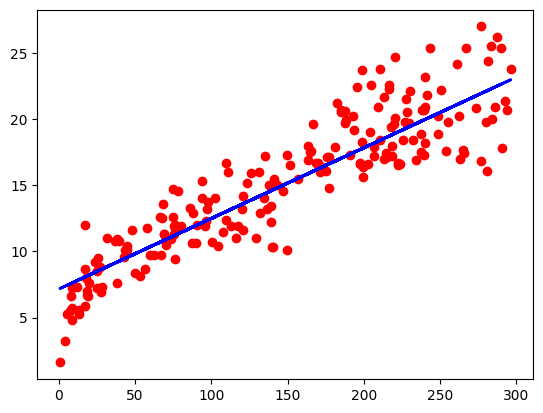

In [23]:
plt.scatter(X_data1, y_data1, color = 'red', label = 'scatter plot')
plt.plot(X_test1, y_pred1, color = 'blue', linewidth = 2, label = 'Regression Line')
plt.show()

In [24]:
# Slope Coefficients(기울기 계수)
w1 = lr_model1.coef_ # 기울기
print(f'slopes of TV: {w1[0]:.2f}')

# Intercept(절편)
b1 = lr_model1.intercept_ # y 절편
print('Intercept is:', b1.round(2))

slopes of TV: 0.05
Intercept is: 7.15


In [25]:
# y = 0.05 x + 7.15

In [26]:
# 새로운 TV광고비를 입력받아 값 예측하기측하기
# TV 광고비: 100 -> sales point?
# x = 100
# y = 0.05 * x + 7.15
# y

tv = 100
print(w1 + tv + b1)
tv_df = pd.DataFrame([[100]],columns=['TV'])
y_pred1 = lr_model1.predict(tv_df)
print(y_pred1)

[107.20398395]
[12.48950109]


### 다중 선형 회귀

In [27]:
# y = ax + b 단순선형회귀
# y = w1x1 + w2x2 + w3x3 + b

In [28]:
# 타겟과 속성 분리하기
# X_data2 = advertising[['TV', 'Ridio', 'Newpaper']] # TODO:YOUR_CODE_HERE
X_data2 = advertising.drop(['Sales'], axis=1) # 컬럼이 많을 때 주로 사용하는 방법
y_data2 = advertising['Sales'] # TODO:YOUR_CODE_HERE

In [29]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


<Axes: >

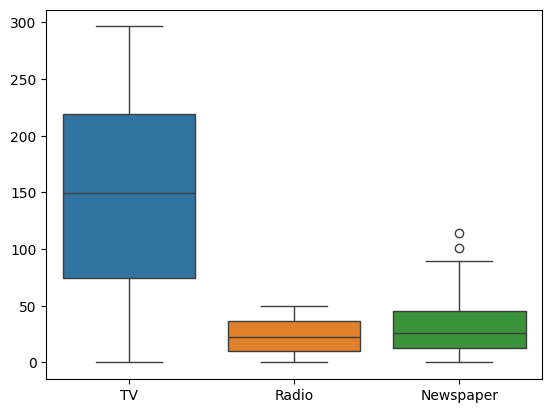

In [30]:
sns.boxplot(X_data2)

In [31]:
# 훈련 데이터와 테스트 데이터를 7:3으로 나누기
# random_state 옵션을 사용하여 훈련 데이터와 테스트 데이터를 동일한 패턴으로 추출하기

In [32]:
from sklearn.model_selection import train_test_split

# TODO:YOUR_CODE_HERE
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_data2, y_data2, test_size=0.3,
                                                        random_state=10,) # TODO:YOUR_CODE_HERE
print(X_train2.shape, X_test2.shape, y_train2.shape, y_test2.shape)

(140, 3) (60, 3) (140,) (60,)


In [33]:
# 속성값의 차이가 있으므로 범위를 일정하게 맞춰 주는 표준화 적용하기

In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # TODO:YOUR_CODE_HERE

X_train_scaled = scaler.fit_transform(X_train2)  # TODO:YOUR_CODE_HERE
X_test_scaled = scaler.transform(X_test2)  # TODO:YOUR_CODE_HERE

<Axes: >

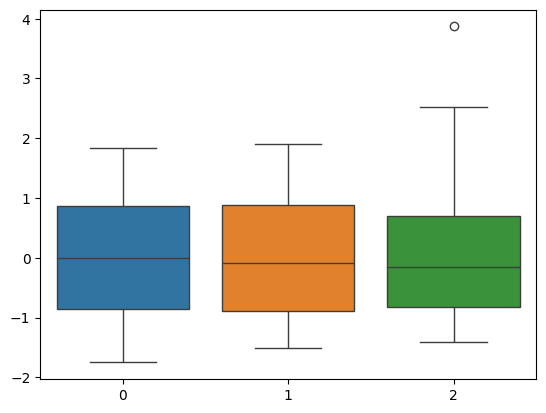

In [35]:
sns.boxplot(X_train_scaled)

In [36]:
# 모델 생성하고 학습시키기

In [37]:
from sklearn.linear_model import LinearRegression

lr_model2 = LinearRegression()# TODO:YOUR_CODE_HERE
lr_model2.fit(X_train_scaled, y_train2) # TODO:YOUR_CODE_HERE

lr_model2

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [38]:
y_pred2 = lr_model2.predict(X_test_scaled)


In [39]:
# 실제값과 예측값을 구해 데이터프레임 형태로 만들기

In [40]:
mlr = pd.DataFrame({'Actual_value': y_test2, 'Model prediction':lr_model2.predict(X_test_scaled)})
mlr.head()

,Actual_value,Model prediction
59,18.4,19.127479
5,7.2,10.658525
20,18.0,19.356496
198,25.5,24.315643
52,22.6,20.751037


In [41]:
# 실제값과 예측값의 오차를 그래프로 표현

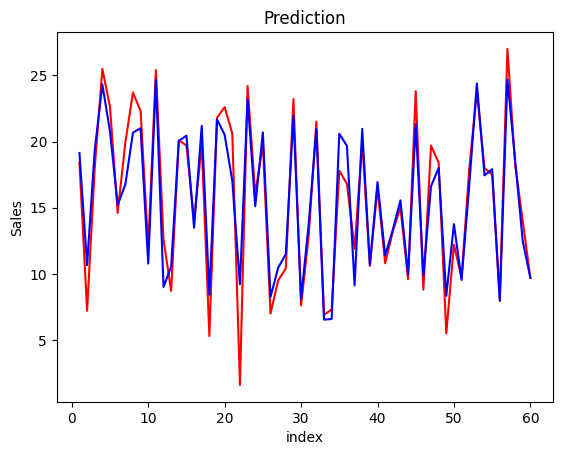

In [42]:
y_pred2 = lr_model2.predict(X_test_scaled)
c = [i for i in range(1, 61, 1)]

plt.plot(c, y_test2, color = 'r')
plt.plot(c, y_pred2, color ='b')
plt.xlabel('index')
plt.ylabel('Sales')
plt.title('Prediction')
plt.show()

In [43]:
# 오차 그래프로 시각화하기

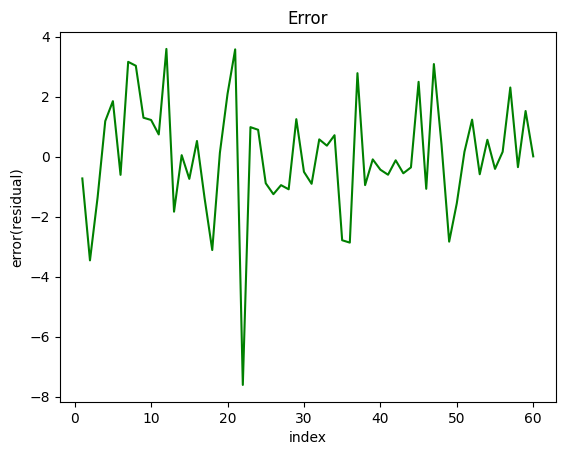

In [44]:
error2 = y_test2 - y_pred2 # TODO:YOUR_CODE_HERE
plt.plot(c, error2, color ='g')
plt.xlabel('index')
plt.ylabel('error(residual)')
plt.title('Error')
plt.show()

In [45]:
print(f'MSE:{mean_squared_error(y_test2, y_pred2):.2f}')
print(f'r2_score:{r2_score(y_test2, y_pred2):.2f}')

MSE:3.66
r2_score:0.90


In [46]:
# 기울기 계수
w2 = lr_model2.coef_ # TODO:YOUR_CODE_HERE
print(f'slopes of TV:{w2[0]:.2f}')
print(f'slopes of Radio:{w2[1]:.2f}')
print(f'slopes of Newspaper:{w2[2]:.2f}')

# 절편
b2 = lr_model2.intercept_ # TODO:YOUR_CODE_HERE
print('Intercept is:', b2.round(2))

slopes of TV:4.23
slopes of Radio:1.55
slopes of Newspaper:0.01
Intercept is: 14.92


In [47]:
# 새로운 값 예측하기 [[180,18,3]]

### 다항회귀

In [48]:
# 다항회귀
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [49]:
X_data = advertising.drop(['Sales'], axis=1)
y_data = advertising['Sales']

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3,
                                                        random_state=10,) # TODO:YOUR_CODE_HERE
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(140, 3) (60, 3) (140,) (60,)


In [51]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [52]:
X_train_poly.shape

(140, 9)

<Axes: >

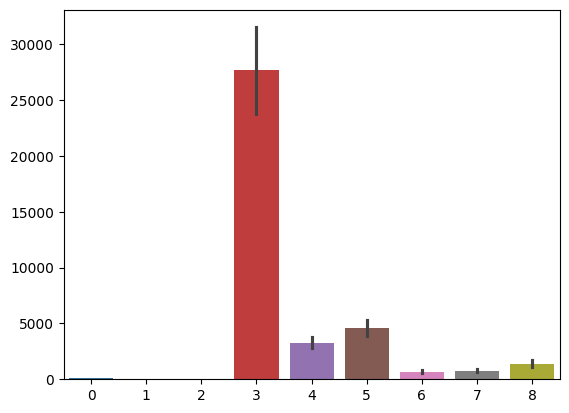

In [53]:
sns.barplot(X_train_poly)

In [54]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() 

X_train_poly_scaled = scaler.fit_transform(X_train_poly)   
X_test_poly_scaled = scaler.transform(X_test_poly)  

<Axes: >

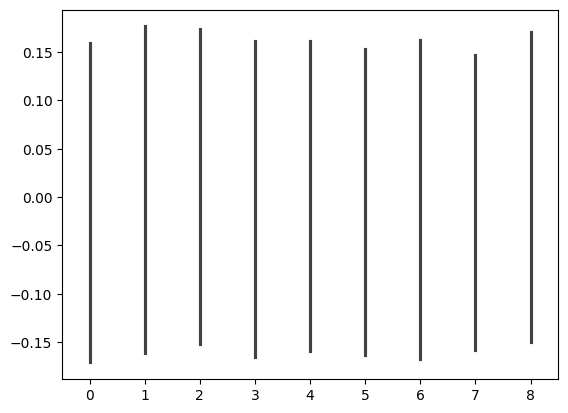

In [55]:
sns.barplot(X_train_poly_scaled)

In [56]:
from sklearn.linear_model import LinearRegression

ml = LinearRegression()
ml.fit(X_train_poly_scaled, y_train)
ml

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [58]:
pred = ml.predict(X_test_poly_scaled)

In [60]:
print(f'MSE:{mean_squared_error(y_test,pred):.2f}')
print(f'r2_score:{r2_score(y_test, pred):.2f}')

MSE:2.12
r2_score:0.94


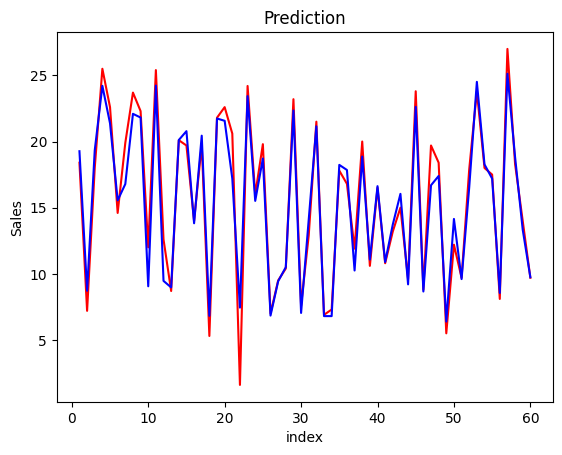

In [62]:
c = [i for i in range(1, 61, 1)]

plt.plot(c, y_test, color = 'r')
plt.plot(c, pred, color ='b')
plt.xlabel('index')
plt.ylabel('Sales')
plt.title('Prediction')
plt.show()

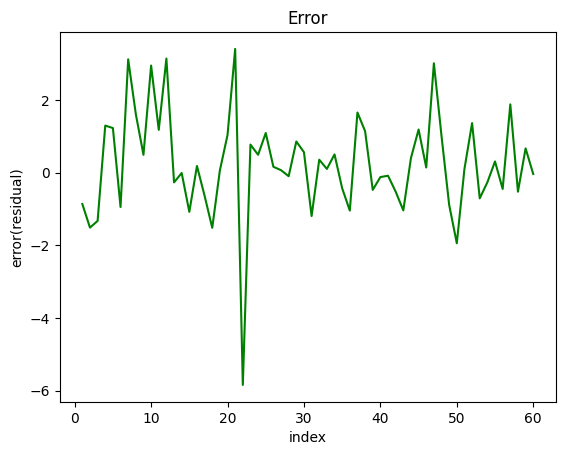

In [64]:
error3 = y_test - pred 
plt.plot(c, error3, color ='g')
plt.xlabel('index')
plt.ylabel('error(residual)')
plt.title('Error')
plt.show()

### 규제

In [69]:
# 규제
from sklearn.linear_model import Ridge

model_ridge = Ridge(alpha = 10)

model_ridge.fit(X_train_poly_scaled, y_train)

,"alpha alpha: {float, ndarray of shape (n_targets,)}, default=1.0Constant that multiplies the L2 term, controlling regularizationstrength. `alpha` must be a non-negative float i.e. in `[0, inf)`.When `alpha = 0`, the objective is equivalent to ordinary leastsquares, solved by the :class:`LinearRegression` object. For numericalreasons, using `alpha = 0` with the `Ridge` object is not advised.Instead, you should use the :class:`LinearRegression` object.If an array is passed, penalties are assumed to be specific to thetargets. Hence they must correspond in number.",10
,"fit_intercept fit_intercept: bool, default=TrueWhether to fit the intercept for this model. If setto false, no intercept will be used in calculations(i.e. ``X`` and ``y`` are expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"max_iter max_iter: int, default=NoneMaximum number of iterations for conjugate gradient solver.For 'sparse_cg' and 'lsqr' solvers, the default value is determinedby scipy.sparse.linalg. For 'sag' solver, the default value is 1000.For 'lbfgs' solver, the default value is 15000.",None
,"tol tol: float, default=1e-4The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for each solver:- 'svd': `tol` has no impact.- 'cholesky': `tol` has no impact.- 'sparse_cg': norm of residuals smaller than `tol`.- 'lsqr': `tol` is set as atol and btol of scipy.sparse.linalg.lsqr, which control the norm of the residual vector in terms of the norms of matrix and coefficients.- 'sag' and 'saga': relative change of coef smaller than `tol`.- 'lbfgs': maximum of the absolute (projected) gradient=max|residuals| smaller than `tol`... versionchanged:: 1.2 Default value changed from 1e-3 to 1e-4 for consistency with other linear models.",0.0001
,"solver solver: {'auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs'}, default='auto'Solver to use in the computational routines:- 'auto' chooses the solver automatically based on the type of data.- 'svd' uses a Singular Value Decomposition of X to compute the Ridge coefficients. It is the most stable solver, in particular more stable for singular matrices than 'cholesky' at the cost of being slower.- 'cholesky' uses the standard :func:`scipy.linalg.solve` function to obtain a closed-form solution.- 'sparse_cg' uses the conjugate gradient solver as found in :func:`scipy.sparse.linalg.cg`. As an iterative algorithm, this solver is more appropriate than 'cholesky' for large-scale data (possibility to set `tol` and `max_iter`).- 'lsqr' uses the dedicated regularized least-squares routine :func:`scipy.sparse.linalg.lsqr`. It is the fastest and uses an iterative procedure.- 'sag' uses a Stochastic Average Gradient descent, and 'saga' uses its improved, unbiased version named SAGA. Both methods also use an iterative procedure, and are often faster than other solvers when both n_samples and n_features are large. Note that 'sag' and 'saga' fast convergence is only guaranteed on features with approximately the same scale. You can preprocess the data with a scaler from :mod:`sklearn.preprocessing`.- 'lbfgs' uses L-BFGS-B algorithm implemented in :func:`scipy.optimize.minimize`. It can be used only when `positive` is True.All solvers except 'svd' support both dense and sparse data. However, only'lsqr', 'sag', 'sparse_cg', and 'lbfgs' support sparse input when`fit_intercept` is True... versionadded:: 0.17 Stochastic Average Gradient descent solver... versionadded:: 0.19 SAGA solver.",'auto'
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive.Only 'lbfgs' solver is supported in this case.",False
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag' or 'saga' to shuffle the data.See :term:`Glossary ` for details... versionadded:: 0.17 `random_state` to support Stochastic Average Gradient.",None


In [71]:
print(f'MSE:{mean_squared_error(y_test,pred):.2f}')
print(f'r2_score:{r2_score(y_test, pred):.2f}')

MSE:2.12
r2_score:0.94


### 단순선형회귀 
MSE: 6.46, 
r2_score: 0.83
### 다중선형회귀
MSE:3.66,
r2_score:0.90
### 다항회귀
MSE:2.12,
r2_score:0.94
### 규제
MSE:2.12,
r2_score:0.94

#### 아직도 통계가 뭔지 이해가 잘 되지 않는다 복습이 많이 필요해보임...